In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'E:\ExcelR ass\naive_bayes\SalaryData_Train.csv')
print(data.shape)        #( 30161, 14)
data.head()

(30161, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data["workclass"].dtype

dtype('O')

In [4]:
# to get categorical attributes :
categorical = [var for var in data.columns if data[var].dtype == 'O']
print("There are {} categorical variables\n".format(len(categorical)))
print("The categorical variables are :\n\n", categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [5]:
# to observe only categorical data :
data[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [6]:
# info :
data[categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   workclass      30161 non-null  object
 1   education      30161 non-null  object
 2   maritalstatus  30161 non-null  object
 3   occupation     30161 non-null  object
 4   relationship   30161 non-null  object
 5   race           30161 non-null  object
 6   sex            30161 non-null  object
 7   native         30161 non-null  object
 8   Salary         30161 non-null  object
dtypes: object(9)
memory usage: 2.1+ MB


In [7]:
# to check for null values :
data[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [8]:
data["workclass"].value_counts(), data["education"].value_counts()

( Private             22285
  Self-emp-not-inc     2499
  Local-gov            2067
  State-gov            1279
  Self-emp-inc         1074
  Federal-gov           943
  Without-pay            14
 Name: workclass, dtype: int64,
  HS-grad         9840
  Some-college    6677
  Bachelors       5044
  Masters         1627
  Assoc-voc       1307
  11th            1048
  Assoc-acdm      1008
  10th             820
  7th-8th          557
  Prof-school      542
  9th              455
  12th             377
  Doctorate        375
  5th-6th          288
  1st-4th          151
  Preschool         45
 Name: education, dtype: int64)

In [9]:
# to check for unique values in each categorical column :
for var in categorical:
    
    print(var, ' contains ', len(data[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [10]:
# similarly to find numerical column :
numerical = [var for var in data.columns if data[var].dtype != 'O']
print("There are {} numerical variables in data ".format(len(numerical)))
print("The variables are :\n\n", numerical)

There are 5 numerical variables in data 
The variables are :

 ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [11]:
# check null values in numerical column :
data[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

Text(0.5, 0, "['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']")

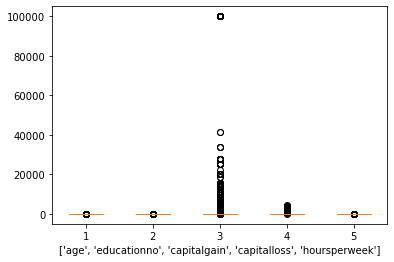

In [12]:
# to check for outliers :
import matplotlib.pyplot as plt
plt.boxplot(data[numerical])
plt.xlabel(numerical)

(30161, 14)


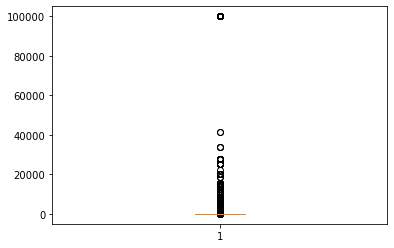

In [13]:
plt.boxplot(data["capitalgain"])
print(data.shape)

(array([2.9429e+04, 5.0000e+02, 7.9000e+01, 3.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4800e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <BarContainer object of 10 artists>)

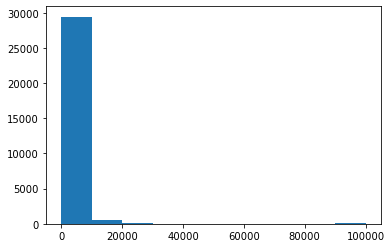

In [14]:
plt.hist(data["capitalgain"])

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

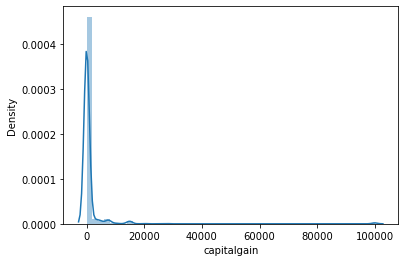

In [15]:
import seaborn as sns
sns.distplot(data["capitalgain"])

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

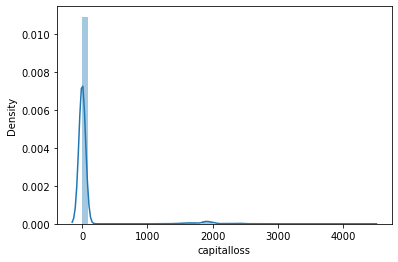

In [16]:
sns.distplot(data["capitalloss"])

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(30161, 14)


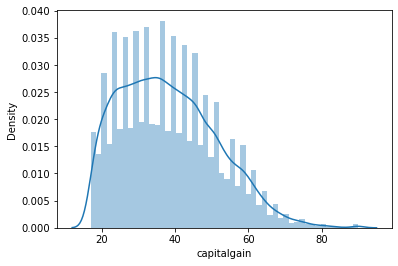

In [17]:
# remove outlier data from capitalgain variable :
data["capitalgain"] = data.loc[data["capitalgain"]<=20000]
sns.distplot(data["capitalgain"])
print(data.shape)

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

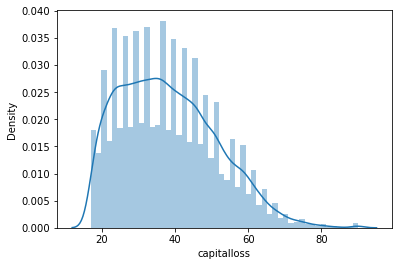

In [18]:
# similarly for capitalloss variable :
data["capitalloss"] = data.loc[data["capitalloss"]<=1000]
sns.distplot(data["capitalloss"])

In [19]:
# now check for null values after removing outliers :
print(data[numerical].isnull().sum())
print(data.shape)              # (30161, 14)

age                0
educationno        0
capitalgain      232
capitalloss     1392
hoursperweek       0
dtype: int64
(30161, 14)


C:\Users\mites\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\mites\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\mites\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\mites\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


Text(0.5, 0, "['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']")

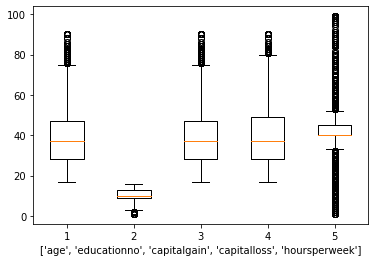

In [20]:
# plot again boxplot to find outliers in numerical variable :
plt.boxplot(data[numerical])
plt.xlabel(numerical)

(array([  511.,  1877.,  1995., 16581.,  3004.,  3736.,  1721.,   421.,
          184.,   131.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

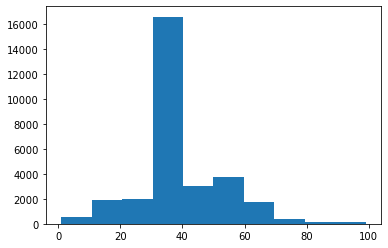

In [21]:
# plot histogram for hoursperweek variable :
plt.hist(data["hoursperweek"])

C:\Users\mites\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hoursperweek', ylabel='Density'>

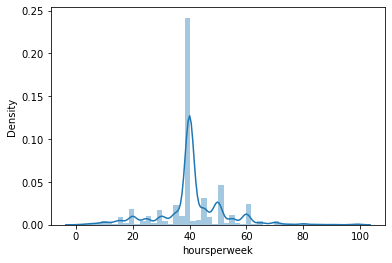

In [22]:
sns.distplot(data["hoursperweek"])

In [23]:
clean_data = data.dropna(axis=0)
print("data :", data.shape)
print("clean_data :", clean_data.shape)
# Removing 5.39 % of data cosidering as outliers 

data : (30161, 14)
clean_data : (28537, 14)


In [24]:
# create dummies and split the data :
y = clean_data["Salary"]
y.head()
train_data = clean_data.iloc[:,0:13]
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,39,39,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,50,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,38,38,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,53,53,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,28,28,40,Cuba


In [65]:
# create dummy for ease of calculation :
x = pd.get_dummies(train_data)
x.shape

(28537, 244)

In [66]:
# now split data for training and tesing purpose :
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=7)
x_train.shape, x_test.shape

((21402, 244), (7135, 244))

In [67]:
# apply Gaussian Naive Bayes :
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [68]:
# for prediction :
import numpy as np
y_pred = gnb.predict(x_test)
np.mean(y_pred == y_test)               # 48.10 % Tesing accuracy 

0.48100911002102315

In [72]:
y_pred_2 = gnb.predict(x_train)
np.mean(y_pred_2 == y_train)            # 48.95 % Training accuracy

0.4895336884403327

In [73]:
# Now apply Feature Engineering to get feature which has high impact to predict Salary :
# Tree Based Feature Selection :
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [74]:
l = model.feature_importances_>0.01
print("Index of columns which has high impact :", np.where(l==True))

Index of columns which has high impact : (array([ 0,  1,  2,  4,  5,  7, 28, 35, 36, 42, 44], dtype=int64),)


In [75]:
# make new_x :
new_x = x.iloc[:,[0,1,2,4,5,7,28,35,36,42,44]]
print(new_x.shape)
new_x.head()

(28537, 11)


,age,educationno,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-not-inc,maritalstatus_ Married-civ-spouse,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Prof-specialty,occupation_ Sales
0,39,13,40,0,0,0,0,0,0,0,0
1,50,13,13,0,0,1,1,0,1,0,0
2,38,9,40,0,1,0,0,0,0,0,0
3,53,7,40,0,1,0,1,0,0,0,0
4,28,13,40,0,1,0,1,0,0,1,0


In [76]:
# again split the data to train for Gaussian Naive Bayes :
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(new_x, y, test_size=0.25, random_state=7)
x_new_train.shape, x_new_test.shape

((21402, 11), (7135, 11))

In [77]:
# apply Gaussian Naive Bayes after Feature selection :
gnb.fit(x_new_train, y_new_train)

GaussianNB()

In [78]:
# training accuracy :
y_train_pred = gnb.predict(x_new_train)
np.mean(y_train_pred == y_new_train)          # 79.64 % Training accuracy 

0.7964208952434352

In [79]:
# predict:
y_new_pred = gnb.predict(x_new_test)
np.mean(y_new_test == y_new_pred)                # 80.10 % Testing accuracy

0.8009810791871058

In [80]:
# MULTINOMIAL NAIVE BAYES :
from sklearn.naive_bayes import MultinomialNB as MB
mb = MB()
mb.fit(x_new_train, y_new_train)

MultinomialNB()

In [81]:
# training accuracy of Multinomial naive bayes :
y_train_pred_mb = mb.predict(x_new_train)
np.mean(y_train_pred_mb == y_new_train)          # 77.74 % Training accuracy 

0.777357256331184

In [82]:
# testing accuracy of Multinomial naive bayes :
y_test_pred_mb = mb.predict(x_new_test)
np.mean(y_test_pred_mb == y_new_test)          # 77.46 % Testing accuracy 

0.7746320953048353

In [83]:
# Therefor , base on different features accuracy we can conclude that Feature obtain using Tree Based Feature selection
# and applying Gaussian Naive Bayes on Extracted Feature data we get model which performs good for Training and Testing data.

# TESTING DATA :
test_data = pd.read_csv(r'E:\ExcelR ass\naive_bayes\SalaryData_Test.csv')
print(test_data.shape)        #(15060, 14)
test_data.head()

(15060, 14)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [84]:
# make dummy data to extract features :
dummy_test_data = pd.get_dummies(test_data)
print(dummy_test_data.shape)
dummy_test_data.head() 

(15060, 104)


,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ <=50K,Salary_ >50K
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [87]:
# make final dataset which has variables of extracted features for training :
final_test_data = dummy_test_data[new_x.columns]
print(final_test_data.shape)
final_test_data.head()

(15060, 11)


,age,educationno,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-not-inc,maritalstatus_ Married-civ-spouse,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Prof-specialty,occupation_ Sales
0,25,7,40,0,1,0,0,0,0,0,0
1,38,9,50,0,1,0,1,0,0,0,0
2,28,12,40,1,0,0,1,0,0,0,0
3,44,10,40,0,1,0,1,0,0,0,0
4,34,6,30,0,1,0,0,0,0,0,0


In [88]:
# set target :
test_y = test_data["Salary"]

In [89]:
# Testing Test data on Gaussian Navie Bayes :
test_data_pred = gnb.predict(final_test_data)

In [90]:
# Accuracy of Testing data :
np.mean(test_data_pred == test_y)            # 79.62 % accuracy for Tesing data

0.7962151394422311

In [91]:
# Apply Multinomial Naive Bayes :
test_data_pred_mb = mb.predict(final_test_data)
np.mean(test_data_pred_mb == test_y)      # 76.25 % accuracy for Testing data

0.7625498007968128

In [ ]:
# Therefor, we can conclude that model created using Gaussian Naive Bayes and exctracted Features using Tree Based feature-
# selection method gives us good Training and Testing accuracy.